In this notebook we try to better understand the results of cross-validation for small MHNs (3x3 or 4x4).
Especially the transferability of lambda results from 3x3 MHNs onto 4x4 MHNs is of our interest

In [1]:
import os
import mhn_tools as mytools
import mhn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "G16_CH_MEL_Events.csv", "G16_CH_PRAD_Events.csv"]
file_path=os.path.join( os.getcwd(), '..','data', file_names[2] )
input = pd.read_csv(file_path)
events=list(input.columns)[1:]

In [3]:
repetitions=5
mhn_sizes=np.repeat([2,3,4],repetitions)
lambdas=[]
for size in mhn_sizes:
    print(f"Doing cv for size {size}")
    optimizer = mhn.optimizers.cMHNOptimizer()
    reduced_data=input[np.random.choice(events,size)]
    #print(reduced_data)
    optimizer.load_data_matrix(reduced_data)
    lam=optimizer.lambda_from_cv(lambda_vector=mytools.getLambdaSearchRange(reduced_data))
    lambdas.append(lam)


Doing cv for size 2


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 2


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 2
Doing cv for size 2


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 2
Doing cv for size 3
Doing cv for size 3


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 3


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 3


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 3


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 4


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 4
Doing cv for size 4
Doing cv for size 4


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\optimizers.py:548: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


Doing cv for size 4


[0.03868471963578337, 0.03868471963578337, 0.012233221993482438, 0.03868471963578337, 0.012233221993482438, 0.012233221993482438, 0.03868471963578337, 0.03868471963578337, 0.03868471963578337, 0.03868471963578337, 0.03868471963578337, 0.0038684969608360487, 0.0012233301042007462, 0.03868471963578337, 0.0038684969608360487]


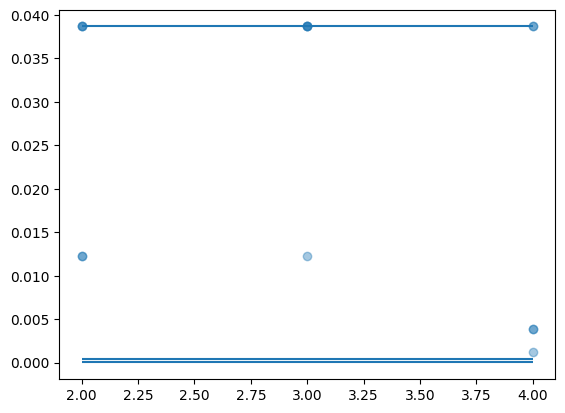

In [ ]:
print(lambdas)

searchrange=mytools.getLambdaSearchRange(input)
lam_mid=1.0/len(input)
lam_max=searchrange.max()
lam_min=searchrange.min()

plt.scatter(mhn_sizes, lambdas,alpha=0.4)
plt.hlines([lam_mid,lam_max,lam_min],min(mhn_sizes), max(mhn_sizes))